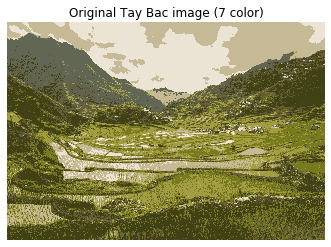

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

taybac = Image.open("taybac.jpg")
taybac = np.array(taybac)
w, h, d = tuple(taybac.shape)
img_1d = np.reshape(taybac, (w * h, d))

def get_label(pixel, centroids):
  return np.linalg.norm(centroids - pixel, axis = 1).argmin()

def get_centroid(labels, centroids):
  return np.take(centroids, labels, axis=0)

def get_label_best(pixels, centroids):
  buf = int(50000000 / centroids.shape[0])
  buf = buf if buf > 0 else 1
  size = int(pixels.shape[0] / buf)
  res = list()
  for i in range(size):
    tmp = []
    for centroid in centroids:
      tmp.append(np.linalg.norm(pixels[buf*i:buf*(i+1)]-centroid, axis=1))
    res += np.array(tmp).argmin(axis=0).tolist()
  remain = np.array([np.linalg.norm(pixels[size*buf:]-centroid, axis=1) for centroid in centroids]).argmin(axis=0)
  if remain.shape[0] > 0:
    res+=(remain.tolist())
  return np.array(res)

def get_new_centroids(pixels, labels, centroids):
  size = centroids.shape[0]
  new_centroids = []
  for i in range(size):
    a = np.where(labels == i)
    c = np.random.randint(255, size=3)
    if len(a[0]) > 0:
      b = np.take(pixels, a, 0)
      c = np.mean(b, dtype=np.int32, axis=1)
    new_centroids.extend(c)
  
  return np.array(new_centroids)

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
  size = img_1d.shape[0]
  pre_l = np.zeros(size, dtype=np.int32)
  cur_l = np.zeros(size, dtype=np.int32)

  centroids = np.array([])
  if init_centroids == 'random':
    centroids = np.random.randint(255, size=(k_clusters, 3))
  else:
    centroids = np.array([img_1d[np.random.randint(w*h)] for i in range(k_clusters)])
    
  for iterator in range(max_iter):
    clusters = [[] for _ in range(k_clusters)]
    cur_l = get_label_best(img_1d, centroids)
    if abs(np.mean(pre_l) - np.mean(cur_l)) < 0.1:
      break
    pre_l = np.copy(cur_l)
    centroids = get_new_centroids(img_1d, cur_l, centroids)

  return np.reshape(get_centroid(cur_l, centroids), (w, h, d))


plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original Tay Bac image (7 color)')
plt.imshow(kmeans(img_1d, 7, 300, 'x'))
plt.show()